In [19]:
# 모듈연습
import sys # 시스템 경로에 모듈 추가
sys.path.append('C:\python\cal.py')

import imp #기존 불러온 모듈을 수정한 경우 리로드 해주어야 함
imp.reload(cal)

import cal

print(cal.division(5,3))


1.6666666666666667


In [126]:

# OS모듈 연습 (파일생성, 삭제, 등 윈도우에서 하는 것들을 파이썬으로)

import os
print(os.getcwd()) #현재 열려있는 폴더(dir)


# 하기 메서드 실행 시 파일(dir)은 비어있어야 함
# os.mkdir('위치/파일명')  해당위치에 파일생성
# os.rmdir('위치/파일명') 해당위치에 있는 파일 제거
# os.makedirs('위치/파일명') 해당 경로에 있는 파일 모두 생성
# os.removedirs('위치/파일명') 해당 경로에 있는 파일 모두 제거
# os.chdir('위치') 해당위치로 현재 위치를 이동
# os.path.exists('위치') 해당 경로가 존재하는지 bool로 응답
# os.path.isdir('위치') 해당 경로에 디렉토리(폴더)가 존재하는지 bool로 응답
# os.path.isfile('위치') 해당 경로에 파일이 존재하는지 bool로 응답
os.path.exists('c:\python\연습.ipynb')



c:\python


True

In [136]:
# txt파일 만들기

import os
print(os.getcwd())

# txt파일 입력하기 // write('  ')

f = open('c:/python/연습.txt','w',encoding='utf-8') # w : 쓰기, r : 읽기, a : 내용 추가하기

for i in range(1,5) :
    f.write(f'{i}번째 줄 입니다.\n')

f.close()

# txt파일 읽어오기 // readline, readlines, read

# readline()
f = open('c:/python/연습.txt','r',encoding='utf-8')

while 1 :
    line = f.readline()
    if not line :
        break
    print(line)
    
f.close()

# readlines()
f = open('c:/python/연습.txt','r',encoding='utf-8')

print(f.readlines())

f.close()

f = open('c:/python/연습.txt','r',encoding='utf-8')

for line in f.readlines() :
    print(line)
    
f.close()

c:\python
1번째 줄 입니다.

2번째 줄 입니다.

3번째 줄 입니다.

4번째 줄 입니다.

['1번째 줄 입니다.\n', '2번째 줄 입니다.\n', '3번째 줄 입니다.\n', '4번째 줄 입니다.\n']
1번째 줄 입니다.

2번째 줄 입니다.

3번째 줄 입니다.

4번째 줄 입니다.



In [1]:
# with함수 이용

with open('with함수.txt','w') as f :
    for i in range(5) :
        f.write(f'{i}번째 줄입니다.\n')

with open('with함수.txt','r') as f :
    print(f.read())



0번째 줄입니다.
1번째 줄입니다.
2번째 줄입니다.
3번째 줄입니다.
4번째 줄입니다.



(-107.682008173822*(969.301122532853 - 0.282899287273118*r**3.53482686237586)/r**2.53482686237586 - 107.682008173822*r**2.53482686237586*(0.651539287273117/r**1.53482686237586 - 0.019015762564925) + (65762937156.2102 - 33594647.8311665*log(10))*(-117396.114931867/r**2.53482686237586 + r**2.53482686237586))/r
(-30.3286087560118*(3426.3116456602 - r**3.53482686237586)/r**2.53482686237586 + 69.849169021766*r**2.53482686237586*(0.0291859031932081 - 1/r**1.53482686237586) + (65762937156.2102 - 33594647.8311665*log(10))*(-117396.114931867/r**2.53482686237586 + r**2.53482686237586))/r


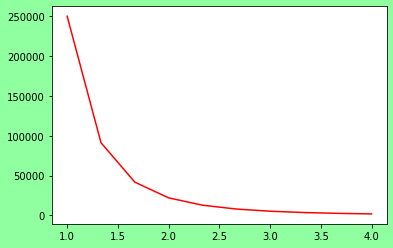

In [46]:
# 리니어 테이퍼 반경방향 응력 계산

import math
import sympy as sp
import numpy as np
from matplotlib import pyplot as plt

# 반경계산
d = None #필름두께



r = sp.symbols('r') # 현재 반경 비
large_r = 10 # 최종 반경 비
# tensile_stress = sp.symbols('ts') #초기 권취 텐션
ts = 400 #초기 권취장력
p_ratio = 0.28 #푸아송비
taper = 20 #테이퍼값

ec = 6.14 #
s11 = 1/0.69 #1/GPa, radial compliance (PET)
s12 = 1/(3*0.69)
s22 = 1/4.14 #1/GPa Hoop compliance (PET)
s23 = -p_ratio * s22 #1/pa poisson compliance (PET)
s33 = s22
s13 = s23

beta = ((s11*s33-(s13**2))/(s22*s33-s23**2))**(1/2) #상수

wt = ts*(1-(taper/100)*((r-1)/(large_r-1))) #와인딩 텐션

rs = ts*(1+p_ratio)*(1/(1-p_ratio**2)) - ts*(1/(1-p_ratio**2))*(taper/100)*(((1+p_ratio)*(r-1)+r)/(large_r-1)) #선형테이퍼일 때 잔류응력

linear_int1 = sp.integrate(rs*(r**int(beta)),(r,1,large_r)) # B값 계산용 

linear_int2 = sp.integrate(rs*(r**(-int(beta))),(r,1,large_r)) # B값 계산용


lg_b_up = ( 2*beta*ts*ec*s22-((ec*(s12-beta*s22)-1)*linear_int1) ) / 2*beta*( (1-s12*ec)*(large_r**(2*beta)-1) + beta*ec*s22*(1+large_r**(2*beta)) )

lg_b_down = ( (ec*(s12+beta*s22)-1)*linear_int2 ) / 2*beta*( (1-s12*ec)*(large_r**(2*beta)-1) + beta*ec*s22*(1+large_r**(2*beta)) )

b = lg_b_up + lg_b_down #설계상수 B값

k = (((2+p_ratio)/(1+p_ratio))*(1/(large_r-1))*(taper/100))-(1+(1/(large_r-1))*(taper/100))

sigma_rr = (1/r) * ( b*(r**beta - (large_r**(2*beta))/r**beta) + (1/(2*beta))*(ts/(1-p_ratio))*( ((large_r**(beta+1)-r**(beta+1))/(beta+1))*(r**(-beta)) + ((large_r**(-beta+1)-r**(-beta+1))/(-beta+1))*(r**beta) )*k ) 

print(sigma_rr)

sigma_rr = (b*(-10**(2*beta)/r**beta + r**beta) - 271.749614197531*(r**beta*(10**(1 - beta) - r**(1 - beta))/(1 - beta) + (10**(beta + 1) - r**(beta + 1))/(r**beta*(beta + 1)))/beta)/r

print(sigma_rr)

r = np.linspace(1,4,10)

y = -((-31.0570987654321*(3162.27766016838 - r**3.5)/r**2.5 - 100000000.0/r**2.5 + 72.4665637860083*r**2.5*(0.0316227766016838 - 1/r**1.5) + 1000*r**2.5)/r)/ts

fig = plt.figure()
fig.patch.set_facecolor('xkcd:mint green')

plt.plot(r,y,'r')
plt.show()



In [36]:
import sympy as sp


b = 10

beta = 2.5
r = sp.symbols('r')

sigma_rr = (b*(-10**(2*beta)/r**beta + r**beta) - 271.749614197531*(r**beta*(10**(1 - beta) - r**(1 - beta))/(1 - beta) + (10**(beta + 1) - r**(beta + 1))/(r**beta*(beta + 1)))/beta)/r

print(sigma_rr)

(-31.0570987654321*(3162.27766016838 - r**3.5)/r**2.5 - 1000000.0/r**2.5 + 72.4665637860083*r**2.5*(0.0316227766016838 - 1/r**1.5) + 10*r**2.5)/r
